In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mramam167x0279","key":"725eb338a706250602b6297fdc689687"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d raghavrpotdar/fresh-and-stale-images-of-fruits-and-vegetables

100% 1.41G/1.41G [00:50<00:00, 26.8MB/s]
100% 1.41G/1.41G [00:50<00:00, 30.0MB/s]


In [5]:
! mkdir fruit_dataset

In [6]:
! unzip fresh-and-stale-images-of-fruits-and-vegetables.zip -d fruit_dataset

Streaming output truncated to the last 5000 lines.
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.02.09 PM.png  
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.02.15 PM.png  
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.02.24 PM.png  
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.02.32 PM.png  
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.02.38 PM.png  
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.06.21 PM.png  
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.06.27 PM.png  
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.06.33 PM.png  
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.06.40 PM.png  
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12

In [7]:
import os
import tensorflow as tf
os.listdir('fruit_dataset/')

['stale_capsicum',
 'fresh_capsicum',
 'fresh_tomato',
 'fresh_bitter_gourd',
 'stale_apple',
 'fresh_apple',
 'stale_bitter_gourd',
 'fresh_orange',
 'stale_orange',
 'stale_banana',
 'stale_tomato',
 'fresh_banana',
 'ImageLabels.txt']

In [8]:
base_dir ='fruit_dataset/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [9]:
fresh_orange_dir = os.path.join(base_dir, 'fresh_orange')
fresh_tomato_dir = os.path.join(base_dir, 'fresh_tomato')
fresh_capsicum_dir = os.path.join(base_dir, 'fresh_capsicum')
fresh_banana_dir = os.path.join(base_dir, 'fresh_banana')
fresh_apple_dir = os.path.join(base_dir, 'fresh_apple')
fresh_bitter_gourd_dir = os.path.join(base_dir, 'fresh_bitter_gourd')
stale_orange_dir = os.path.join(base_dir, 'stale_orange')
stale_tomato_dir = os.path.join(base_dir, 'stale_tomato')
stale_capsicum_dir = os.path.join(base_dir, 'stale_capsicum')
stale_banana_dir = os.path.join(base_dir, 'stale_banana')
stale_apple_dir = os.path.join(base_dir, 'stale_apple')
stale_bitter_gourd_dir = os.path.join(base_dir, 'stale_bitter_gourd')


In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1.0/255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    vertical_flip= True,
                    fill_mode='nearest',
                    validation_split=0.2
                    )

train_generator = train_datagen.flow_from_directory(
                      base_dir, 
                      target_size= (150, 150),  
                      batch_size= 32,
                      shuffle = True,
                      subset = 'training',
                      class_mode= 'categorical' 
                      )


validation_generator = train_datagen.flow_from_directory(
                          base_dir, 
                          target_size= (150, 150),
                          batch_size= 32, 
                          shuffle = True,
                          subset = 'validation',
                          class_mode= 'categorical'
                          )

Found 11749 images belonging to 12 classes.
Found 2933 images belonging to 12 classes.


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D
from tensorflow.keras.applications import ResNet50


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(1024, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(512, activation='relu'),
    #tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(12, activation='softmax')
])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 36, 36, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 34, 34, 512)       590336    
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 17, 17, 512)     

In [20]:
model.compile(loss = 'categorical_crossentropy',
              optimizer= tf.optimizers.Adam(), 
              metrics= ['accuracy'])

In [21]:
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95):
            print("\nakurasi lebih besar dari 96%. maka training berhenti!") 
            self.model.stop_training = True 
 
callbacks = myCallback()

In [22]:
history = model.fit(
          train_generator,
          epochs=40, 
          steps_per_epoch=len(train_generator),
          validation_data=validation_generator,
          validation_steps=len(validation_generator),
          verbose=2,
          callbacks = [callbacks])

Epoch 1/40
368/368 - 134s - loss: 1.3462 - accuracy: 0.5148 - val_loss: 0.6772 - val_accuracy: 0.7405 - 134s/epoch - 364ms/step
Epoch 2/40
368/368 - 131s - loss: 0.6039 - accuracy: 0.7766 - val_loss: 0.5460 - val_accuracy: 0.7917 - 131s/epoch - 355ms/step
Epoch 3/40
368/368 - 130s - loss: 0.4478 - accuracy: 0.8325 - val_loss: 0.4183 - val_accuracy: 0.8421 - 130s/epoch - 354ms/step
Epoch 4/40
368/368 - 131s - loss: 0.3877 - accuracy: 0.8553 - val_loss: 0.3923 - val_accuracy: 0.8841 - 131s/epoch - 357ms/step
Epoch 5/40
368/368 - 132s - loss: 0.3181 - accuracy: 0.8787 - val_loss: 0.3318 - val_accuracy: 0.8759 - 132s/epoch - 359ms/step
Epoch 6/40
368/368 - 131s - loss: 0.2651 - accuracy: 0.8984 - val_loss: 0.3179 - val_accuracy: 0.8929 - 131s/epoch - 357ms/step
Epoch 7/40
368/368 - 132s - loss: 0.2243 - accuracy: 0.9183 - val_loss: 0.3598 - val_accuracy: 0.8848 - 132s/epoch - 360ms/step
Epoch 8/40
368/368 - 132s - loss: 0.2235 - accuracy: 0.9146 - val_loss: 0.3837 - val_accuracy: 0.8946 - 

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pathlib
%matplotlib inline

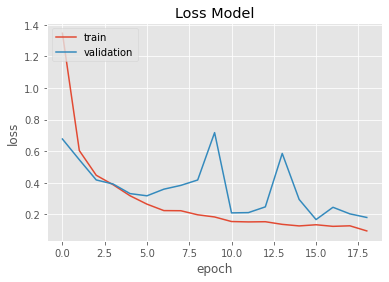

In [24]:
plt.style.use("ggplot")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

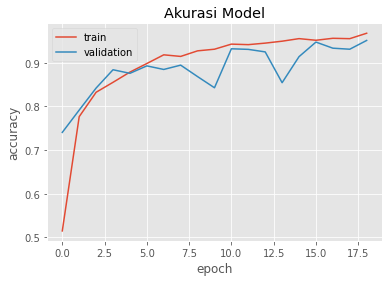

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [26]:
loss = model.evaluate(validation_generator, steps=len(validation_generator))

92/92 [==============================] - 27s 290ms/step - loss: 0.1890 - accuracy: 0.9502


In [27]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image

In [28]:
print(train_generator.class_indices)

{'fresh_apple': 0, 'fresh_banana': 1, 'fresh_bitter_gourd': 2, 'fresh_capsicum': 3, 'fresh_orange': 4, 'fresh_tomato': 5, 'stale_apple': 6, 'stale_banana': 7, 'stale_bitter_gourd': 8, 'stale_capsicum': 9, 'stale_orange': 10, 'stale_tomato': 11}


Saving apple1.jpg to apple1 (1).jpg
1/1 [==============================] - 0s 16ms/step
apple1.jpg
fresh_apple


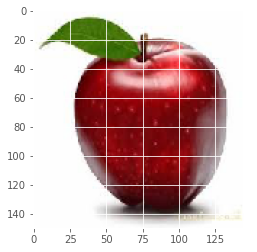

In [41]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150,150))
 
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
  classes = model.predict(images, batch_size=32) 
  output_class = np.argmax(classes) 
  print(fn)
  if classes[0,0]!=0:
   print('fresh_apple')
  elif classes[0,1]!=0:
    print('fresh_banana')
  elif classes[0,2]!=0:
    print('fresh_bitter_gourd')
  elif classes[0,3]!=0:
    print('fresh_capsicum')
  elif classes[0,4]!=0:
    print('fresh_orange')
  elif classes[0,5]!=0:
    print('fresh_tomato')
  elif classes[0,6]!=0:
   print('stale_apple')
  elif classes[0,7]!=0:
    print('stale_banana')
  elif classes[0,8]!=0:
    print('stale_bitter_gourd')
  elif classes[0,9]!=0:
    print('stale_capsicum')
  elif classes[0,10]!=0:
    print('stale_orange')
  elif classes[0,11]!=0:
    print('stale_tomato')
  else:
   print('tidak di ketahui')

In [42]:
model.save('fruit_model.h5')